# Deliverable 6

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
from tensorflow.keras.layers.experimental import preprocessing
import plotly.express as px
import plotly.graph_objects as go
import math
print(tf.__version__) # 2.4.1
print(keras.__version__) # 2.4.0
# Some helping function definitions

2.9.1
2.9.0


In [10]:
v1_outputcolumns = -1
v2_neurons = 128
v3_nr_of_d_layers = 8
v4_activation_function = "relu"
v5_loss_function ="mean_absolute_error"
v6_optimizer = "Adam"
v7_metrics = 'accuracy'
v8_learning_rate = 0.001
v9_nr_of_epochs = 500
v10_d_split = 0.2
v11_train_function = 0.8
v12_csv_separator = ";"

if v3_nr_of_d_layers < 1:
    v3_nr_of_d_layers = 1

In [11]:
def create_data(csv):
        b=1000
        f = open(csv,'w')
        f.write("x1;x2;y\n")
        foctors =[1000,2000,3000,4000,5000]
        for factor in foctors:
            for i in range(361):
                y=int(b+factor*math.sin(i*math.pi/180))
                f.write(str(factor) + ";"+ str(i) + ";" + str(y) +"\n")
        f.close()
        return(csv)


In [12]:
def plot_loss(history):
                plt.plot(history.history['loss'], label='training_loss')
                plt.plot(history.history['val_loss'], label='validation_loss')
                plt.xlabel('Epoch')
                plt.ylabel('Error [y]')
                plt.legend()
                plt.grid(True)
                plt.show()


In [13]:
def plot_prediction_comparison(pred_a, pred_b,tit):
            lmin = min(min(pred_a), min(pred_b))
            lmax = max(max(pred_a), max(pred_b))
            plt.figure()
            a = plt.axes(aspect='equal', title=tit)
            plt.scatter(pred_a, pred_b)
            plt.xlabel('True Values [Y]')
            plt.ylabel('Predictions [Y]')
            lims = [lmin, lmax]
            plt.xlim(lims)
            plt.ylim(lims)
            plt.plot(lims, lims)
            plt.show()


In [17]:
def plot_3D_surface(dataset,x,y,z):
    fig = plt.figure()
    ax = fig.gca(projections='3d')
    surf = ax.plot_trisurf(dataset[x],dataset[y],dataset[z],cmap=plt.cm.jet, linewidth = 0.01)
    fig.colourbar(surf,shrink=0.5,aspect = 5)
    plt.show()

In [38]:
def correlation_plot(dataset):
    sns.heatmap(dataset.corr(),annot=True)
    plt.show()

In [321]:
def predicted_result(x):
    result = x[0] * x[1]
    result = result * 103600
    return result
    

In [39]:
def pair_plot(dataset):
    sns.pairplot(dataset,diag_kind='kde')
    plt.show()

In [40]:
def get_mean_and_standarddeviation(model):
    mean_std = list()
    weights = model.layers[0].get_weights()[0]
    biases = model.layers[0].get_weights()[1]
    standard_deviation_all = list()
    mean_all = list()
    for i in range(len(biases)):
        standard_deviation_all.append(np.sqrt(biases[i]))
        mean_all.append(weights[i])
    mean_std.append(mean_all)
    mean_std.append(standard_deviation_all)
    return(mean_std)
    

In [64]:
def get_layers_weights_biases(model,nr_of_d_layers):
    layers_wights = list()
    layers_biases = list()
    for i in range(1, nr_of_d_layers+2):
        weight = model.layers[i].get_weights()[0]
        bias = model.layers[i].get_weights()[1]
        layers_wights.append(weight)
        layers_biases.append(bias)
    
    return(layers_wights,layers_biases)                                      

# Normalization Function

In [327]:
def normalize_list(val_list,mean_all_list,standard_deviation_all_list):
    test_fa = list()
    for i in range(len(val_list)):
            x_normalize = list()
            x1_normalize = (val_list[i][0]-mean_all_list[0])/standard_deviation_all_list[0]
            x2_normalize = (val_list[i][1]-mean_all_list[1])/standard_deviation_all_list[1]
            x_normalize.append([x1_normalize,x2_normalize])
            test_fa.append(x_normalize)
#             print(test_fa)
    
    
    
    
    return(test_fa)

In [183]:
def dotproduct(v1,v2):
    return sum(x*y for x,y in zip(v1,v2))

In [184]:
def ReLU(x):
    return x * (x > 0)

In [185]:
def sigmoid(x):
    return 1/(1+math.e**(-x))

# My_Prediction Function

In [328]:
def MyPrediction(X,layers_wights,layers_biases,mean_all,standard_deviation_all,activation_function):
    normalized_data = normalize_list(X,mean_all,standard_deviation_all)
    print('The normalized_data is {}',normalized_data)
    predicted_values = list()
    for a in normalized_data:
#         print(a)
        for i in range(len(a)):
            weights = layers_wights[i-1]
#             print('The weight value is {}',weights)
            biases = layers_biases[i-1]
#             print('The bias value is {}',biases)
#             print('The type of a is {}',a[0].dtypes)
            z =  dotproduct(a,weights)+biases
            if i < len(layers_wights):
                if activation_function == 'relu':
                    a = ReLU(z)
                elif activation_function == 'sigmoid':
                    a = sigmoid(z)
                else:
                    print("ERROR: Unknown Activation Function")
                    print("ERROR: RELU applied as activation function")
                    a=Relu(z)
            else:
                a=z #Final Layer
        
        a = predicted_result(a)
        predicted_values.append(a)
    return(predicted_values)

In [311]:
def find_global_minimum_response(X,layers_wights,layers_biases,mean,stddev,AF,any_required_variables):
    response= MyPrediction(X,layers_wights,layers_biases,mean,stddev,AF)
    optimum = "contains_all required outputs as mentioned in the above comments"
    return(optimum)

In [312]:
# Create Sample Data
csv_file=create_data("sinx.csv")
dataset = pd.read_csv(csv_file,sep=';', header=0)



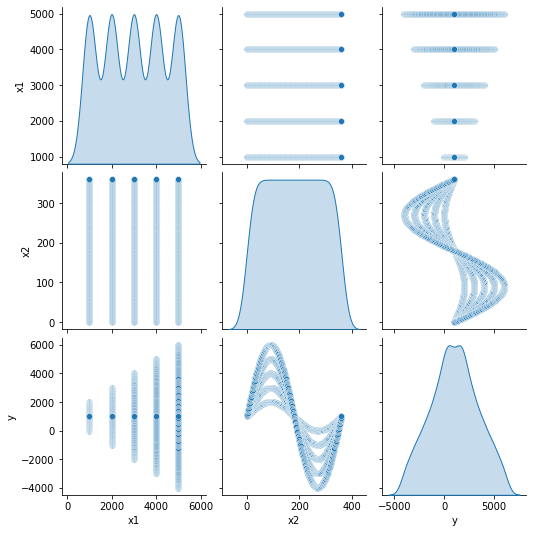

In [293]:
pair_plot(dataset)

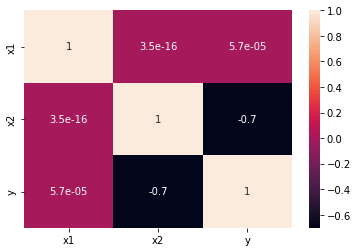

In [275]:
correlation_plot(dataset)

In [276]:
column_names = list(dataset.columns)
objectiveFunction = column_names[-1] # The last column will be label (output)

In [277]:
# Prepare train and test data
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop(objectiveFunction)
test_labels = test_features.pop(objectiveFunction)


In [278]:
# A DNN regression
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
model = tf.keras.models.Sequential()
model.add(normalizer)
for i in range(v3_nr_of_d_layers):
    model.add(tf.keras.layers.Dense(v2_neurons, activation=v4_activation_function))
model.add(tf.keras.layers.Dense(1))

In [279]:
if v6_optimizer == "Adam":
    model.compile(loss=v5_loss_function,optimizer = tf.keras.optimizers.Adam(v8_learning_rate),metrics = [v7_metrics])
elif v6_optimizer == "SGD":
    model.compile(loss=v5_loss_function,optimizer = tf.keras.optimizers.SGD(v8_learning_rate),metrics = [v7_metrics])  
else:
    model.compile(loss=v5_loss_function,optimizer = tf.keras.optimizers.Adam(v8_learning_rate),metrics = [v7_metrics])

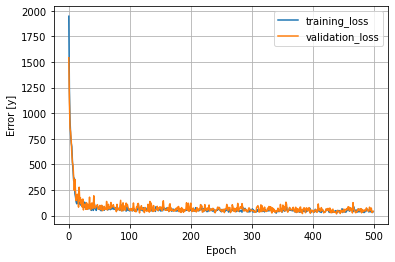

In [280]:
history = model.fit(train_features,train_labels, validation_split = v10_d_split,verbose = 0, epochs = v9_nr_of_epochs)
plot_loss(history)

In [281]:
test_pred_model = model.predict(test_features).flatten()

12/12 [==============================] - 0s 3ms/step


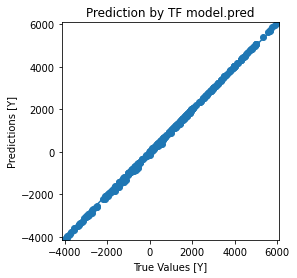

In [282]:
plot_prediction_comparison(test_labels,test_pred_model, 'Prediction by TF model.pred')

In [283]:
layers_wights, layers_biases = get_layers_weights_biases(model, v3_nr_of_d_layers)
mean_stddev = get_mean_and_standarddeviation(model)
mean_all = mean_stddev[0]
stddev_all = mean_stddev[1]
test_values = test_features.values.tolist()

In [332]:
test_pred_eq = MyPrediction(test_1p, layers_wights, layers_biases, mean_all, stddev_all, v4_activation_function)
print('The Final Predicted value by our own built-in model is ',test_pred_eq)

The normalized_data is {} [[[-1.419863963068285, -0.8695824558143754]]]
The Final Predicted value by our own built-in model is  [2029.7986582481333]


# Testing Data for self_made and built_in Model

In [333]:
test_1p = [[1000,90]]
print('test_1_point')
print(test_1p)
print('y_by_model.predict')`
print(model.predict(test_1p))
print('y_by_MyPrediction')
test_1p_eq = MyPrediction(test_1p,layers_wights,layers_biases,mean_all,stddev_all,v4_activation_function)
print(test_1p_eq)

test_1_point
[[1000, 90]]
y_by_model.predict
1/1 [==============================] - 0s 78ms/step
[[2026.2643]]
y_by_MyPrediction
The normalized_data is {} [[[-1.419863963068285, -0.8695824558143754]]]
[2029.7986582481333]


# Comment

The Model.predict() predicted the output value to be 2026.2643 when this built-in function was used and the Manual prediction procedure predicted that output to be 2029.7986, which within 1 to 1.5% percent of error which is acceptable in terms of its accuracy.